In this notebook I want to explore, given 2 2D polyhedrons, how can I find out what all the possible contact modes there are between them and the corresponding contact locations, constraints, whether contact or no contact

In [1]:
from large_gcs.contact.contact_pair_mode import generate_contact_pair_modes
from large_gcs.contact.rigid_body import RigidBody, MobilityType
from large_gcs.geometry.polyhedron import Polyhedron
import numpy as np

np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
import matplotlib.pyplot as plt

Number of contact pair modes:  10
InContactPairModes: 5


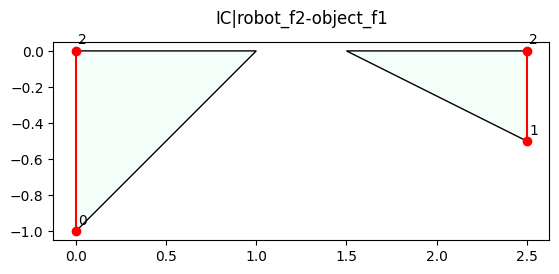

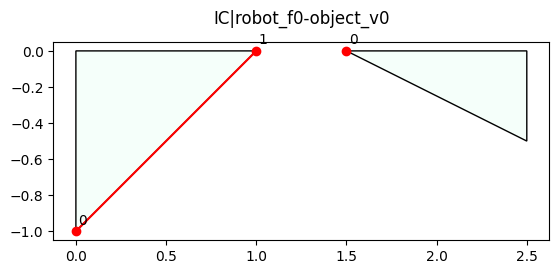

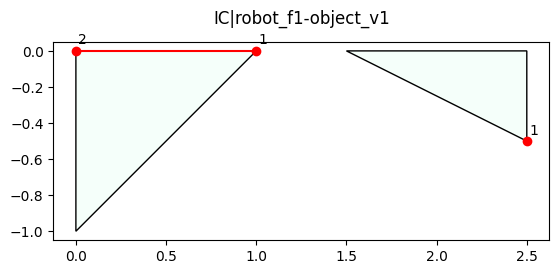

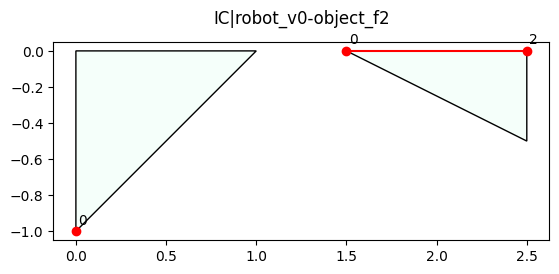

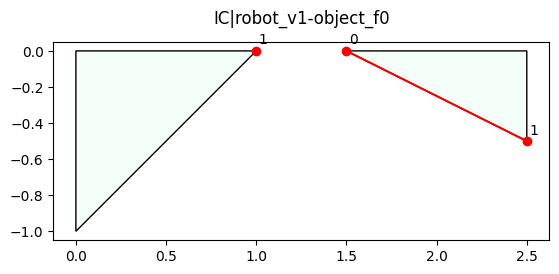

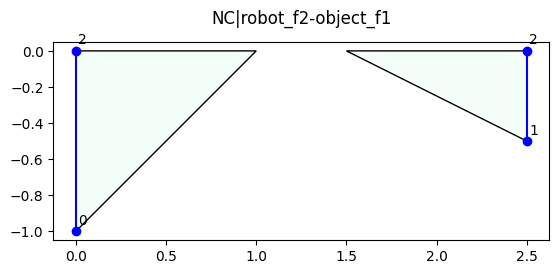

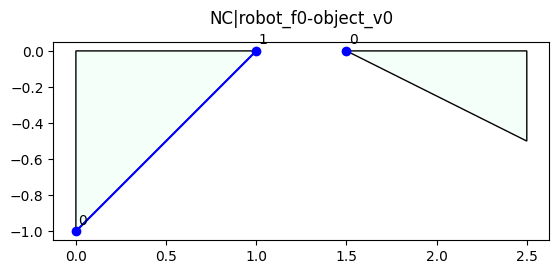

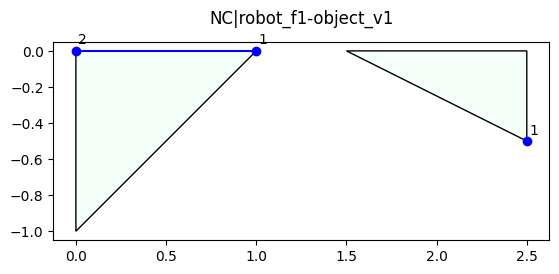

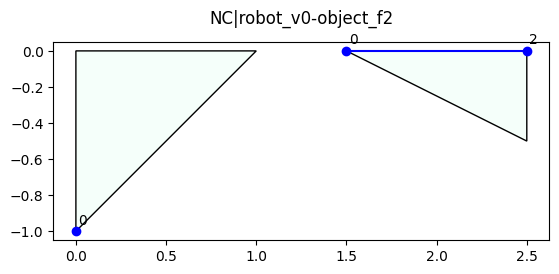

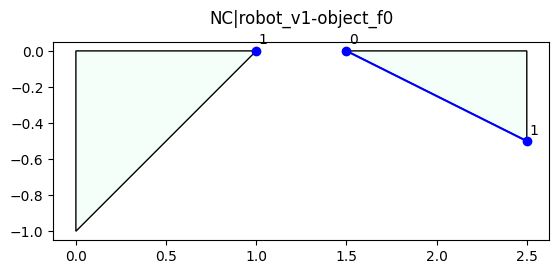

In [2]:
from large_gcs.contact.contact_pair_mode import InContactPairMode


obj_vertices = np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0])
# obj_vertices = np.array([[0, 0], [1, 0.2], [0.7, -0.5]]) + np.array([1.5,0])
# obj_vertices = np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([1.5,0])
obs = RigidBody(
    name="robot",
    geometry=Polyhedron.from_vertices([[0, 0], [1, 0], [0, -1]]),
    mobility_type=MobilityType.ACTUATED,
)
obj = RigidBody(
    name="object",
    geometry=Polyhedron.from_vertices(obj_vertices),
    mobility_type=MobilityType.UNACTUATED,
)
# obs.geometry.plot()
# obj.geometry.plot()


contact_pair_modes = generate_contact_pair_modes(obs, obj)
print("Number of contact pair modes: ", len(contact_pair_modes))
print(f"InContactPairModes: {len([cpm for cpm in contact_pair_modes if isinstance(cpm, InContactPairMode)])}")
for contact_pair_mode in contact_pair_modes:
    contact_pair_mode.plot()

In [3]:
len(contact_pair_modes)

10

Testing individual functionality

In [4]:
obj = RigidBody(
    name="object",
    geometry=Polyhedron.from_vertices([[0, 0], [1, 0], [1, -0.5]]),
    mobility_type=MobilityType.ACTUATED,
)
# obj.geometry.plot(mark_center=True)
# print("vertices", obj.geometry.vertices)
# print("A", obj.geometry.set.A())
# print("b", obj.geometry.set.b())
# obj.geometry.plot_face(0, color="r")
# obj.geometry.plot_halfspace(2, color="blue", alpha=0.5, linestyle="-.")

# v = ContactLocationVertex(body=obj, index=2)
# v.plot()
# e = ContactLocationEdge(body=obj, halfspace_index=0)
# e.adj_vertex_indices

100%|██████████| 112/112 [00:00<00:00, 16767.63it/s]


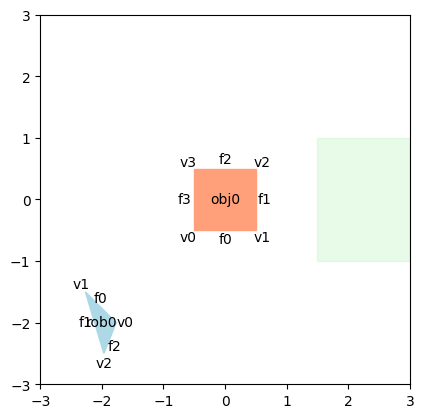

In [8]:
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams


graph_file = ContactGraphGeneratorParams.graph_file_path_from_name("cg_simple_3")
cg = ContactGraph.load_from_file(
    graph_file,
)
len(cg.vertex_names)
cg.plot()

100%|██████████| 112/112 [00:00<00:00, 15774.41it/s]


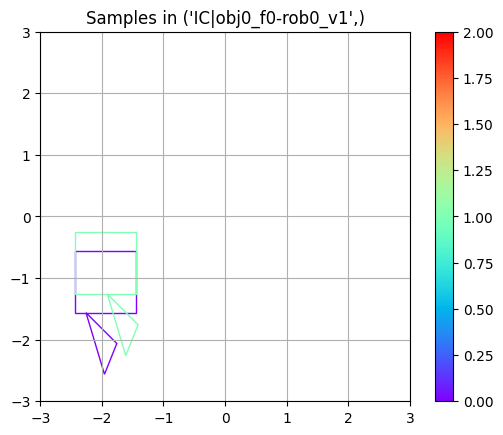

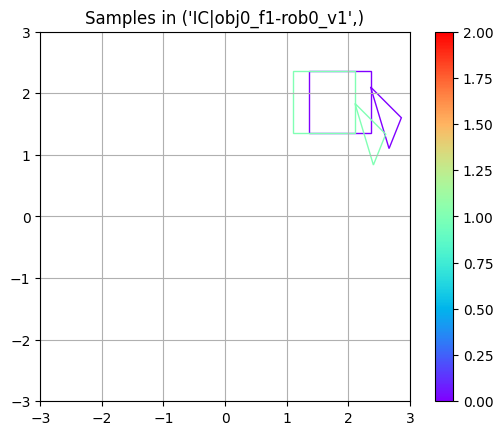

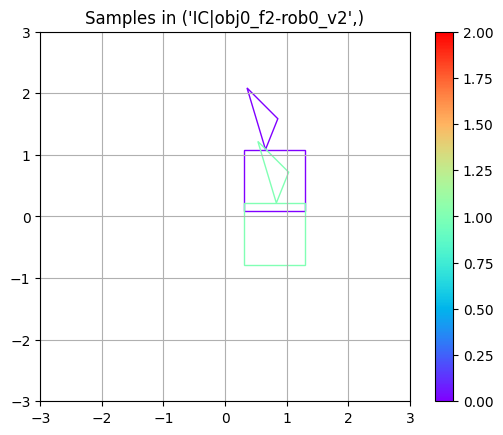

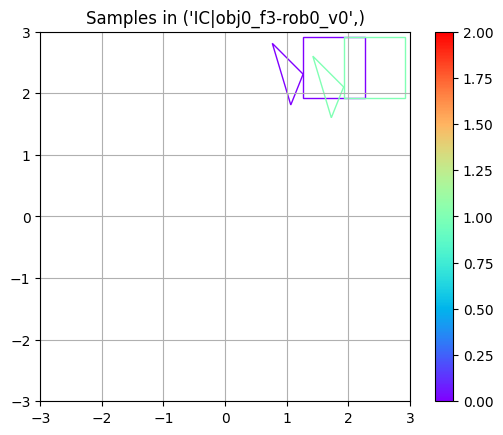

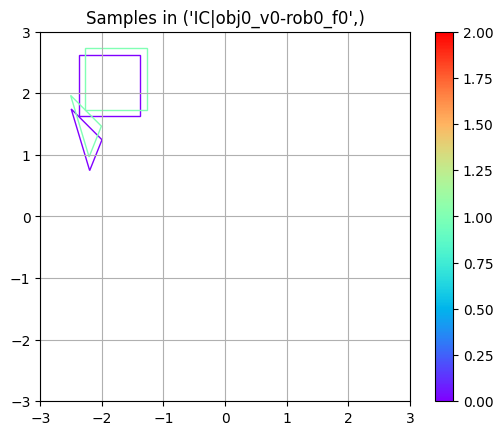

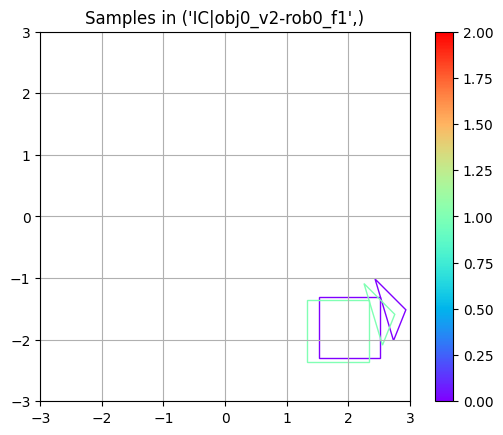

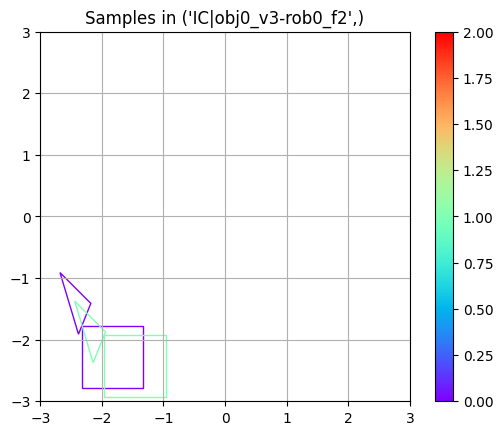

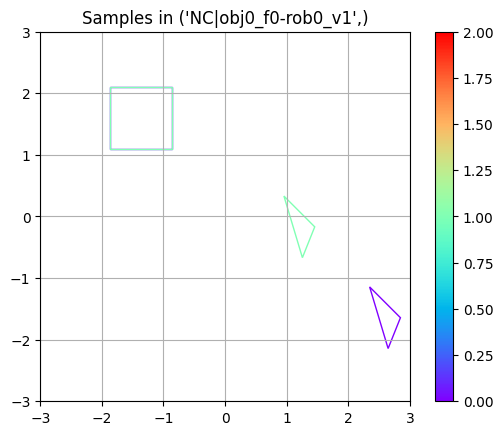

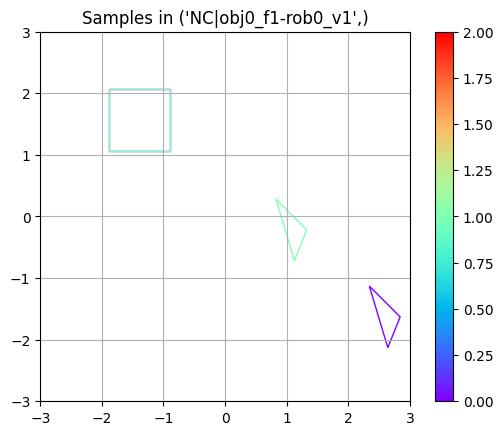

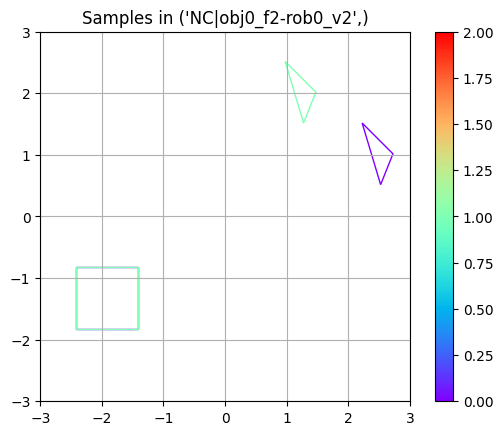

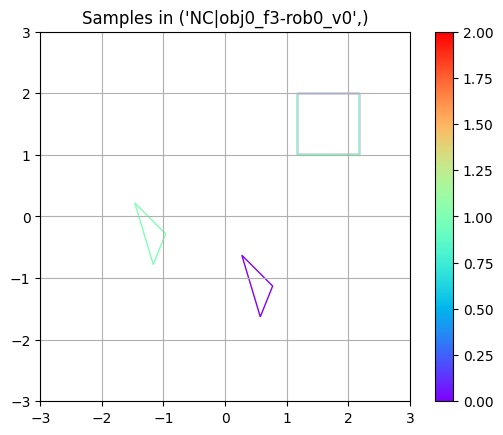

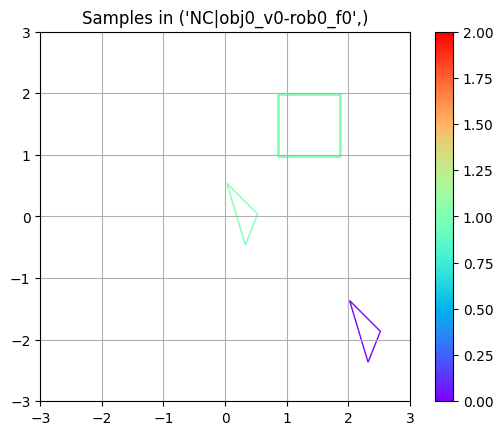

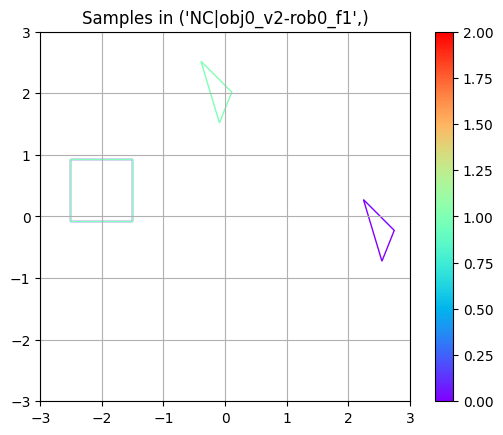

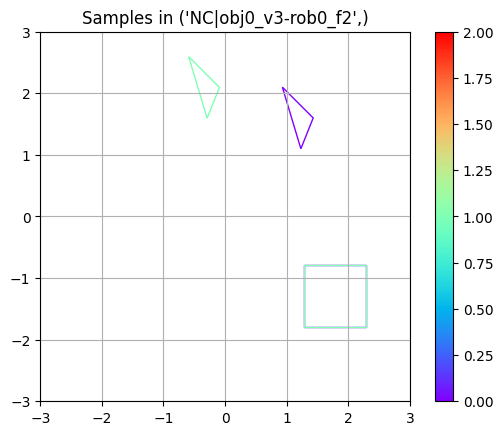

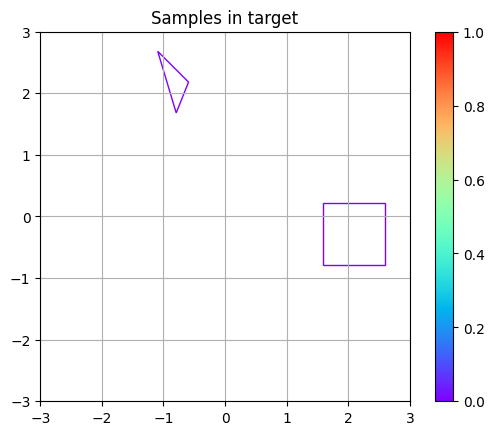

In [7]:


for vertex_name in cg.vertex_names:
    cg.generate_and_plot_samples_in_set(vertex_name, 1)

In [6]:
cg.vertex_names

["('IC|obj0_f0-rob0_v1',)",
 "('IC|obj0_f1-rob0_v1',)",
 "('IC|obj0_f2-rob0_v2',)",
 "('IC|obj0_f3-rob0_v0',)",
 "('IC|obj0_v0-rob0_f0',)",
 "('IC|obj0_v2-rob0_f1',)",
 "('IC|obj0_v3-rob0_f2',)",
 "('NC|obj0_f0-rob0_v1',)",
 "('NC|obj0_f1-rob0_v1',)",
 "('NC|obj0_f2-rob0_v2',)",
 "('NC|obj0_f3-rob0_v0',)",
 "('NC|obj0_v0-rob0_f0',)",
 "('NC|obj0_v2-rob0_f1',)",
 "('NC|obj0_v3-rob0_f2',)",
 'source',
 'target']

In [13]:
cg.vertices[cg.vertex_names[-3]].convex_set.constraint_formulas

[<Formula "(((0.92847669088525919 * (-0.70114802268482679 + obj0_pos(0, 0) - rob0_pos(0, 0)) - 0.37139067635410394 * (0.58045921012358703 + obj0_pos(1, 0) - rob0_pos(1, 0))) / 0.99999999999999989) >= 0)">,
 <Formula "(((0.92847669088525919 * (-0.70114802268482679 + obj0_pos(0, 1) - rob0_pos(0, 1)) - 0.37139067635410394 * (0.58045921012358703 + obj0_pos(1, 1) - rob0_pos(1, 1))) / 0.99999999999999989) >= 0)">,
 <Formula "(obj0_force_res(0) == ( - obj0_pos(0, 0) + obj0_pos(0, 1)))">,
 <Formula "(obj0_force_res(1) == ( - obj0_pos(1, 0) + obj0_pos(1, 1)))">,
 <Formula "(obj0_force_res(0) == 0)">,
 <Formula "(obj0_force_res(1) == 0)">,
 <Formula "(rob0_force_res(0) == ( - rob0_pos(0, 0) + rob0_pos(0, 1)))">,
 <Formula "(rob0_force_res(1) == ( - rob0_pos(1, 0) + rob0_pos(1, 1)))">,
 <Formula "(rob0_force_res(0) == rob0_force_act(0))">,
 <Formula "(rob0_force_res(1) == rob0_force_act(1))">,
 <Formula "((0.50000000722240889 + obj0_pos(0, 0)) <= 3)">,
 <Formula "((0.49999999816070195 + obj0_pos(